## Q2: Histrograms

Here we will read in columns of numbers from a file and create a histogram, using NumPy routines.  Make sure you have the data file
"`sample.txt`" in the same directory as this notebook. You download it from  https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt (and use python to download a file!)

  * Use `np.loadtxt()` to read this file in.  

  * Next, use `np.histogram()` to create a histogram array.  The output returns both the count and an array of edges.
  
  * Finally, loop over the bins and print out the bin center (averaging the left and right edges of the bin) and the count for that bin.

Center =  -27.129262572005736
Count =  3
Center =  -20.21093194037355
Count =  4
Center =  -13.29260130874136
Count =  9
Center =  -6.374270677109173
Count =  22
Center =  0.5440599545230143
Count =  22
Center =  7.462390586155202
Count =  22
Center =  14.38072121778739
Count =  9
Center =  21.299051849419577
Count =  7
Center =  28.217382481051764
Count =  1
Center =  35.135713112683945
Count =  1


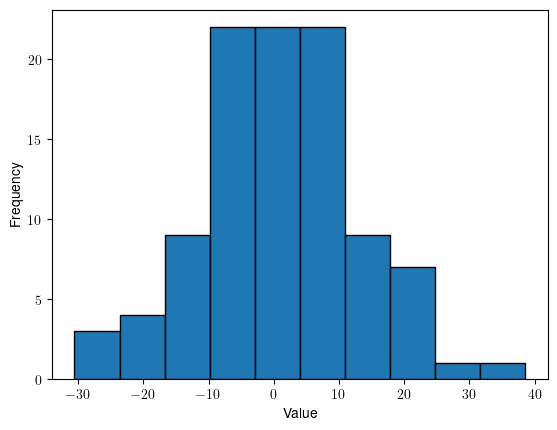

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
import urllib.request

# retrive and save the dataset
url = "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt"
file_name = "sample.txt"
urllib.request.urlretrieve(url, file_name)

# load data and build the histogram
data = np.loadtxt(file_name,usecols=1)
counts, bins = np.histogram(data)

# print the bin center and the count
centers = (bins[1:] + bins[:-1]) / 2
for count,center in zip(counts, centers):
    print("Center = ", center)
    print("Count = ", count)

# plot the histogram
fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(111)
ax.bar(centers, counts, width=np.diff(bins), edgecolor="black")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
plt.show()

## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

For an array of size 1000:
My result: 28.95088257315651
numpy's result: 28.95088257315651
My runtime: 0.1056 ms
numpy's runtime: 0.108 ms


Runtimes for different array sizes:


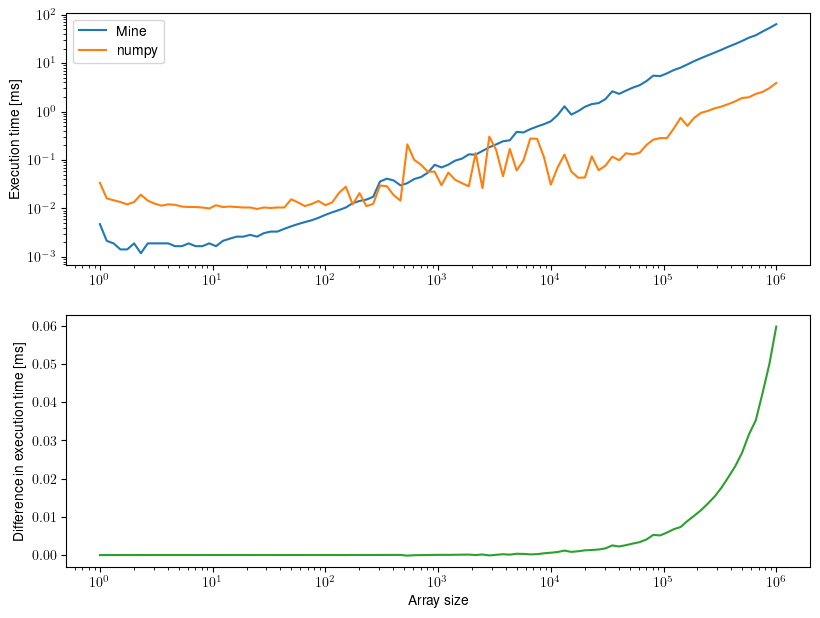

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
import random
import time

def std_dev(a):
    size = len(a)
    ave = sum(a)/size
    sqrs = 0
    for element in a:
        sqrs += (element - ave)**2
    sqrs /= size
    return np.sqrt(sqrs)

# here i define an array and a separate numpy array to not cheat
size_array = 1000
my_array = [random.uniform(0,100) for _ in range(size_array)]
np_array = np.array( my_array )

# compute std and take times
t0 = time.time()
mine = std_dev(my_array)
t1 = time.time()
numpy = np_array.std()
t2 = time.time()

# print results
print(f"For an array of size {size_array}:") 
print(f"My result: {mine}")
print(f"numpy's result: {numpy}")
print(f"My runtime: {(t1-t0)*1e3:.4g} ms")
print(f"numpy's runtime: {(t2-t1)*1e3:.4g} ms")



# test speed for different sizes of the array
sizes = np.logspace(0,6,100)
deltas1 = []
deltas2 = []
diff = []

for size in sizes:

    my_array = [random.uniform(0,100) for _ in range(int(size))]
    np_array = np.array( my_array )

    t0 = time.time()
    std_dev(my_array)
    t1 = time.time()
    np_array.std()
    t2 = time.time()
    
    deltas1.append((t1-t0)*1e3)
    deltas2.append((t2-t1)*1e3)
    diff.append((t1-t0)-(t2-t1))

print("\n\nRuntimes for different array sizes:")

# plot results
fig = plt.figure(figsize=(9.6,7.2))
fig.tight_layout()
ax1 = fig.add_subplot(211) 
ax1.plot(sizes, deltas1, label="Mine")
ax1.plot(sizes, deltas2, label="numpy")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylabel("Execution time [ms]")
ax1.legend()

ax2 = fig.add_subplot(212, sharex = ax1)
ax2.plot(sizes, diff, color="C2")
ax2.set_xscale("log")
#ax2.set_yscale("log")
ax2.set_xlabel("Array size")
ax2.set_ylabel("Difference in execution time [ms]")

plt.show()